# Reference calculations

This is preloading code.

In [6]:
from data_provider import *
from solvers.dummy.phrase_plugin import *
from solvers.dummy.hardcoded_in_file import *

print("Real data, test=nord_stream, training=brexit")
testset = "nord_stream"
test_provider = BSNLPBlindTest(types=[testset], training_data_provider=get_brexit_for_lang)
data = {}
for l in ["pl", "cs", "ru", "bg"]:
    if l not in data:
        data[l] = []
    for _, x in test_provider(l):
        data[l] += x
#     prophecy.lemma_as_word = True
#     prophecy.lang_dict = data
ner = PhrasePlugin(HardCodedInFile(data, ["application_data/test_data_from_bsnlp/annotated/"+testset+"/%s/*.txt"], 
                        cast=lambda x: (x[0],x[2])))
lemma = HardCodedInFile(data, ["application_data/test_data_from_bsnlp/annotated/"+testset+"/%s/*.txt.with_lemmas"], 
                        cast = lambda x: (x[0], x[1], x[2]))
ids = HardCodedInFile(data, ["application_data/test_data_from_bsnlp/annotated/"+testset+"/%s/*.txt.with_lemmas.with_ids"])

Real data, test=nord_stream, training=brexit
Skipping answer:  ('Leave.EU', 'Leave.EU', 'ORG')  as it doesnt contain 4 elements
Skipping answer:  ('Днес+', 'Днес+', 'ORG')  as it doesnt contain 4 elements
Skipping answer:  ('Би Би Си', 'Би Би Си', 'PRO')  as it doesnt contain 4 elements


Comparision of Type0 with and without local-matching and without.

In [11]:
from solvers import null_solver, prophecy, type0, wikidata, wikidata2, prych
from solvers.fixers import simplefixer
from solvers.wikidatan import identifier
from metrics import mentions_catch, lea
from collections import defaultdict
from solvers.dummy.hardcoded_in_file import *
from solvers.dummy.phrase_plugin import *
from solvers.dummy.lemma_plugin import *
import visualize
import fasttext_decorator
from polyglot_decorator import *
from solvers import null_solver
import common

res = common.compare_methods(
    NULL = {"ner": ner, "lemmatizer": lemma, "identifier": null_solver.identifier},
    T0 = {"ner": ner, "lemmatizer": lemma, "identifier": type0.identifier},
    T0_L = {"ner": ner, "lemmatizer": lemma, "identifier": type0.identifier_with_localphrase},
    test_provider = test_provider,
    metric_factory=lambda:lea.Lea(exact=True)
)
visualize.summarize_results(res[0], res[1:])

 33%|███▎      | 1/3 [00:06<00:13,  6.72s/it]

Flush on  ner <class 'solvers.dummy.phrase_plugin.PhrasePlugin'>
Got exception 
Flush on  lemmatizer <class 'solvers.dummy.hardcoded_in_file.HardCodedInFile'>
Got exception 
Flush on  identifier <class 'function'>
Got exception 


 67%|██████▋   | 2/3 [00:25<00:10, 10.36s/it]

Flush on  ner <class 'solvers.dummy.phrase_plugin.PhrasePlugin'>
Got exception 
Flush on  lemmatizer <class 'solvers.dummy.hardcoded_in_file.HardCodedInFile'>
Got exception 
Flush on  identifier <class 'function'>
Got exception 


100%|██████████| 3/3 [00:46<00:00, 15.64s/it]

Flush on  ner <class 'solvers.dummy.phrase_plugin.PhrasePlugin'>
Got exception 
Flush on  lemmatizer <class 'solvers.dummy.hardcoded_in_file.HardCodedInFile'>
Got exception 
Flush on  identifier <class 'function'>
Got exception 

Lang     |Category |Method   |F1       |PRECIS   |P[NUM]   |RECALL   |R[NUM]   |metric   |
--------------------------------------------------------------
All      |All      |NULL     |0.288529 |0.558869 |10790    |0.194462 |10411    |Lea      |
All      |All      |T0       |0.288360 |0.558965 |10790    |0.194297 |10411    |Lea      |
All      |All      |T0_L     |0.321146 |0.604254 |10790    |0.218686 |10411    |Lea      |
--------------------------------------------------------------
All      |EVT      |NULL     |0.065934 |0.052632 |34       |0.088235 |57       |Lea      |
All      |EVT      |T0       |0.021978 |0.017544 |34       |0.029412 |57       |Lea      |
All      |EVT      |T0_L     |0.065934 |0.052632 |34       |0.088235 |57       |Lea      |
-------

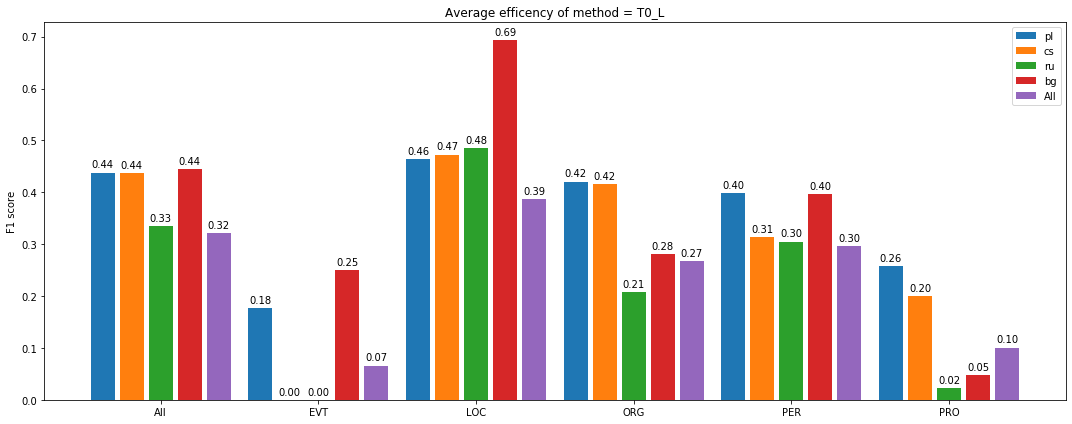

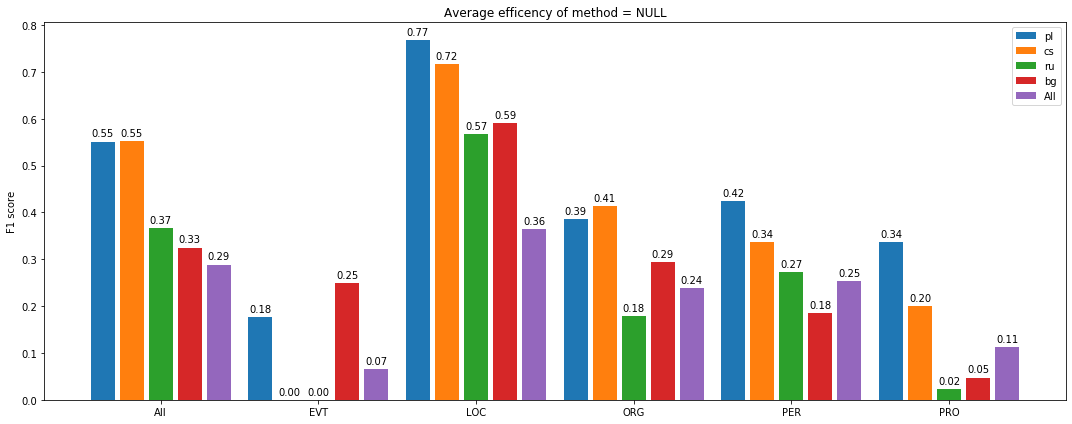

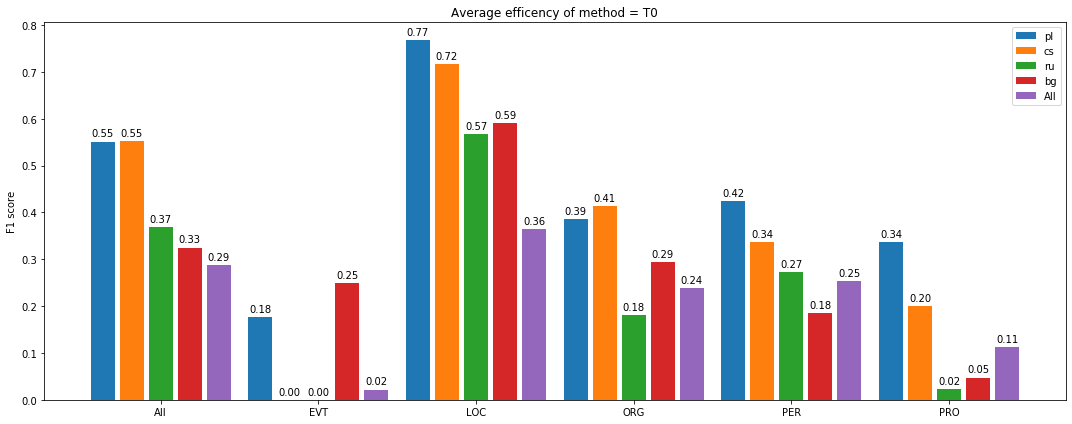

In [3]:
from visualize import visualize_all_categories, visualize_multiple_categories
visualize_multiple_categories(res)

## Wikidata

In [1]:
from solvers.wikidatan import repository
gl_rep = repository.Repository(preload_dictionaries=True)

using recalculated wikidata file - threshold updates won't be applied. Remove  application_data/wikidata/cached.PRO.pickle  to apply them again
using recalculated wikidata file - threshold updates won't be applied. Remove  application_data/wikidata/cached.PER.pickle  to apply them again
using recalculated wikidata file - threshold updates won't be applied. Remove  application_data/wikidata/cached.ORG.pickle  to apply them again
using recalculated wikidata file - threshold updates won't be applied. Remove  application_data/wikidata/cached.EVT.pickle  to apply them again
using recalculated wikidata file - threshold updates won't be applied. Remove  application_data/wikidata/cached.LOC.pickle  to apply them again


In [2]:
# optymalna konfiguracja obliczona ręcznie dla danych brexit
opt_conf_fasttext = [{"lang": "pl", "cat": "EVT", "th": 0.95},
        {"lang": "pl", "cat": "LOC", "th": 0.95},
        {"lang": "pl", "cat": "ORG", "th": 0.95},
        {"lang": "cs", "cat": "EVT", "th": 0.9},
        {"lang": "cs", "cat": "LOC", "th": 0.9},
        {"lang": "cs", "cat": "ORG", "th": 0.9},
        {"lang": "ru", "cat": "EVT", "th": 0.9},
        {"lang": "ru", "cat": "ORG", "th": 0.9},
        {"lang": "ru", "cat": "PRO", "th": 0.7},
        {"lang": "bg", "cat": "EVT", "th": 0.9},
        {"lang": "bg", "cat": "ORG", "th": 0.75},
       ]

In [7]:
from solvers import null_solver, prophecy, type0, wikidata, wikidata2, prych
from solvers.fixers import simplefixer
from solvers.wikidatan import identifier
from metrics import mentions_catch, lea
from collections import defaultdict
from solvers.dummy.hardcoded_in_file import *
from solvers.dummy.phrase_plugin import *
from solvers.dummy.lemma_plugin import *
from data_provider import *
import visualize
import fasttext_decorator
from polyglot_decorator import *
from solvers import null_solver
import common

fixer = simplefixer.SeparateFixer(gl_rep, opt_conf_fasttext)

fixer2 = simplefixer.SimpleFixer(gl_rep, 0.9,0.9, categories=["ORG"], enrich=False)
res2 = common.compare_identifier_methods(
    ner = ner,
    lemma = lemma,
    H_RAW = {"identifier": identifier.Type1Identifier()},
    WH = {"identifier": identifier.Identifier(gl_rep)},
    WH_F = {"identifier": identifier.Identifier(gl_rep), 
            "answer_fixer": fixer},
    BSNLP = {"identifier": identifier.Identifier(gl_rep), 
             "answer_fixer": fixer2},
    test_provider = test_provider,
    metric_factory=lambda:lea.Lea(exact=True)
)
visualize.summarize_results(res2[0], res2[1:])
# fixer2.reload_words()
# fixer.reload_words()

 25%|██▌       | 1/4 [00:05<00:16,  5.36s/it]

Flush on  ner <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  lemmatizer <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  identifier <class 'solvers.wikidatan.identifier.Type1Identifier'>
Got exception 


 50%|█████     | 2/4 [15:20<09:16, 278.17s/it]

Flush on  ner <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  lemmatizer <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  identifier <class 'solvers.wikidatan.identifier.Identifier'>
Identifier is Flushing
[SeparateFixer] start processing  pl EVT


  v1 = v1 / np.linalg.norm(v1)


simple fixer: 100%|██████████| 10/10 [00:00<00:00, 3054.62it/s]

Using stripped file
[SeparateFixer] end processing  pl EVT
[SeparateFixer] start processing  pl LOC




simple fixer: 100%|██████████| 150/150 [00:24<00:00,  6.21it/s]

simple fixer:   0%|          | 0/218 [00:00<?, ?it/s]

[SeparateFixer] end processing  pl LOC
[SeparateFixer] start processing  pl ORG



simple fixer: 100%|██████████| 218/218 [00:08<00:00, 25.53it/s]


[SeparateFixer] end processing  pl ORG
[SeparateFixer] start processing  cs EVT



simple fixer: 100%|██████████| 9/9 [00:00<00:00, 885.97it/s]



Using stripped file
[SeparateFixer] end processing  cs EVT
[SeparateFixer] start processing  cs LOC


simple fixer: 100%|██████████| 173/173 [00:24<00:00,  7.04it/s]

simple fixer:   3%|▎         | 5/182 [00:00<00:04, 42.52it/s]

[SeparateFixer] end processing  cs LOC
[SeparateFixer] start processing  cs ORG



simple fixer: 100%|██████████| 182/182 [00:03<00:00, 50.29it/s]


[SeparateFixer] end processing  cs ORG



simple fixer: 0it [00:00, ?it/s]

[SeparateFixer] start processing  ru EVT
[SeparateFixer] end processing  ru EVT
[SeparateFixer] start processing  ru ORG




simple fixer:   0%|          | 0/180 [00:00<?, ?it/s]

Using stripped file



simple fixer: 100%|██████████| 180/180 [00:03<00:00, 51.03it/s]

simple fixer: 100%|██████████| 12/12 [00:00<00:00, 469.22it/s]


[SeparateFixer] end processing  ru ORG
[SeparateFixer] start processing  ru PRO
[SeparateFixer] end processing  ru PRO
[SeparateFixer] start processing  bg EVT



simple fixer: 100%|██████████| 2/2 [00:00<00:00, 19284.16it/s]



Using stripped file
[SeparateFixer] end processing  bg EVT
[SeparateFixer] start processing  bg ORG


simple fixer: 100%|██████████| 129/129 [00:01<00:00, 86.24it/s][A


[SeparateFixer] end processing  bg ORG



simple fixer: 100%|██████████| 10/10 [00:00<00:00, 2427.12it/s]

simple fixer:   0%|          | 0/150 [00:00<?, ?it/s]

[SeparateFixer] start processing  pl EVT
[SeparateFixer] end processing  pl EVT
[SeparateFixer] start processing  pl LOC



simple fixer: 100%|██████████| 150/150 [00:24<00:00,  6.12it/s]

simple fixer:   0%|          | 0/218 [00:00<?, ?it/s]

[SeparateFixer] end processing  pl LOC
[SeparateFixer] start processing  pl ORG



simple fixer: 100%|██████████| 218/218 [00:08<00:00, 25.27it/s]


[SeparateFixer] end processing  pl ORG



simple fixer: 100%|██████████| 9/9 [00:00<00:00, 1149.51it/s]

simple fixer:   0%|          | 0/173 [00:00<?, ?it/s]

[SeparateFixer] start processing  cs EVT
[SeparateFixer] end processing  cs EVT
[SeparateFixer] start processing  cs LOC



simple fixer: 100%|██████████| 173/173 [00:28<00:00,  6.08it/s]

simple fixer:   3%|▎         | 5/182 [00:00<00:03, 47.62it/s]

[SeparateFixer] end processing  cs LOC
[SeparateFixer] start processing  cs ORG



simple fixer: 100%|██████████| 182/182 [00:03<00:00, 46.75it/s]


[SeparateFixer] end processing  cs ORG



simple fixer: 100%|██████████| 2/2 [00:00<00:00, 21345.06it/s]

simple fixer:   0%|          | 0/129 [00:00<?, ?it/s]

[SeparateFixer] start processing  bg EVT
[SeparateFixer] end processing  bg EVT
[SeparateFixer] start processing  bg ORG



simple fixer: 100%|██████████| 129/129 [00:01<00:00, 86.66it/s][A


[SeparateFixer] end processing  bg ORG



simple fixer: 0it [00:00, ?it/s]

simple fixer:   0%|          | 0/180 [00:00<?, ?it/s]

[SeparateFixer] start processing  ru EVT
[SeparateFixer] end processing  ru EVT
[SeparateFixer] start processing  ru ORG



simple fixer: 100%|██████████| 180/180 [00:03<00:00, 47.66it/s]

simple fixer: 100%|██████████| 12/12 [00:00<00:00, 376.83it/s]


[SeparateFixer] end processing  ru ORG
[SeparateFixer] start processing  ru PRO
[SeparateFixer] end processing  ru PRO


 75%|███████▌  | 3/4 [22:07<05:16, 316.89s/it]

Flush on  ner <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  lemmatizer <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  identifier <class 'solvers.wikidatan.identifier.Identifier'>
Identifier is Flushing
Flush on  answer_fixer <class 'solvers.fixers.simplefixer.SeparateFixer'>
Got exception 



simple fixer: 100%|██████████| 218/218 [00:10<00:00, 20.98it/s]

simple fixer: 100%|██████████| 182/182 [00:03<00:00, 51.35it/s]

simple fixer: 100%|██████████| 180/180 [00:04<00:00, 42.69it/s]

simple fixer: 100%|██████████| 129/129 [00:01<00:00, 85.07it/s][A

simple fixer: 100%|██████████| 218/218 [00:09<00:00, 23.98it/s]

simple fixer: 100%|██████████| 182/182 [00:04<00:00, 44.58it/s]



simple fixer: 100%|██████████| 129/129 [00:01<00:00, 84.45it/s][A

100%|██████████| 4/4 [27:38<00:00, 414.68s/it]

Flush on  ner <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  lemmatizer <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  identifier <class 'solvers.wikidatan.identifier.Identifier'>
Identifier is Flushing
Flush on  answer_fixer <class 'solvers.fixers.simplefixer.SimpleFixer'>
Got exception 
NER cached:  3997/4568
Lemma cached:  3997/4568
function [compare_identifier_methods] finished in 27 min 39 s 505 ms

Lang     |Category |Method   |F1       |PRECIS   |P[NUM]   |RECALL   |R[NUM]   |metric   |
--------------------------------------------------------------
All      |All      |BSNLP    |0.466964 |0.605238 |10790    |0.380120 |10411    |Lea      |
All      |All      |H_RAW    |0.316690 |0.597226 |10790    |0.215475 |10411    |Lea      |
All      |All      |WH       |0.483444 |0.625462 |10790    |0.393986 |10411    |Lea      |
All      |All      |WH_F     |0.457311 |0.609005 |10790    |0.366117 |10411    |Lea      |
--------------------------------------

IsADirectoryError: [Errno 21] Is a directory: 'application_data/fasttext_stripped'

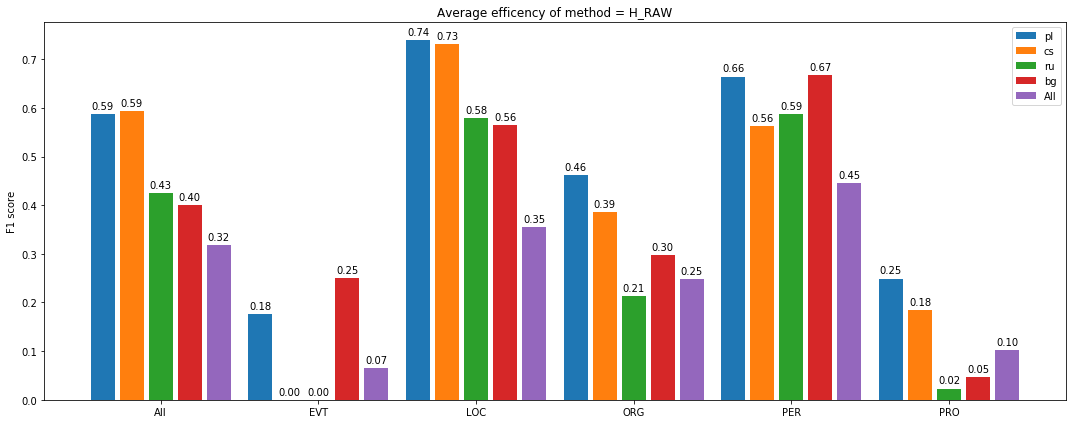

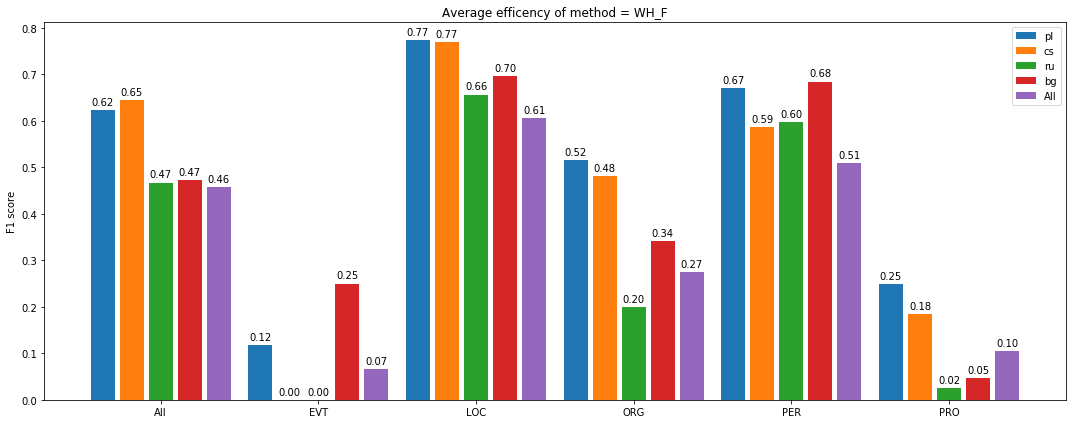

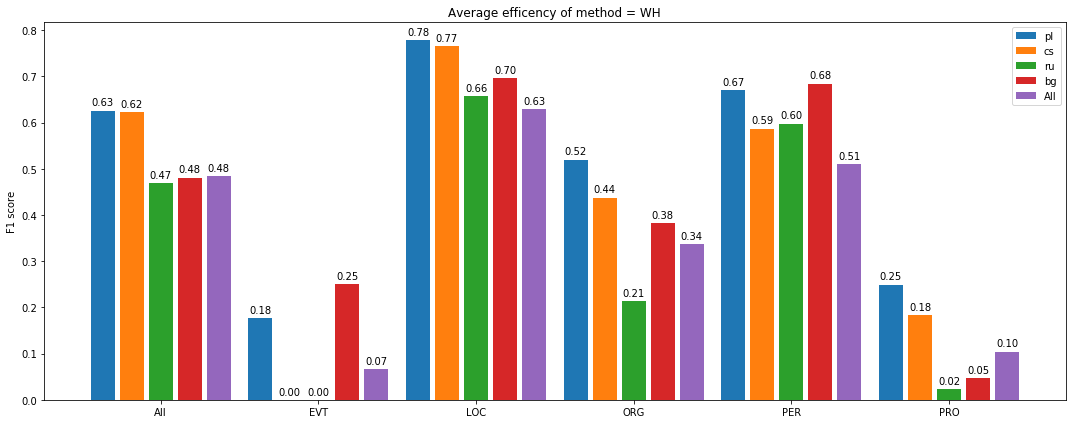

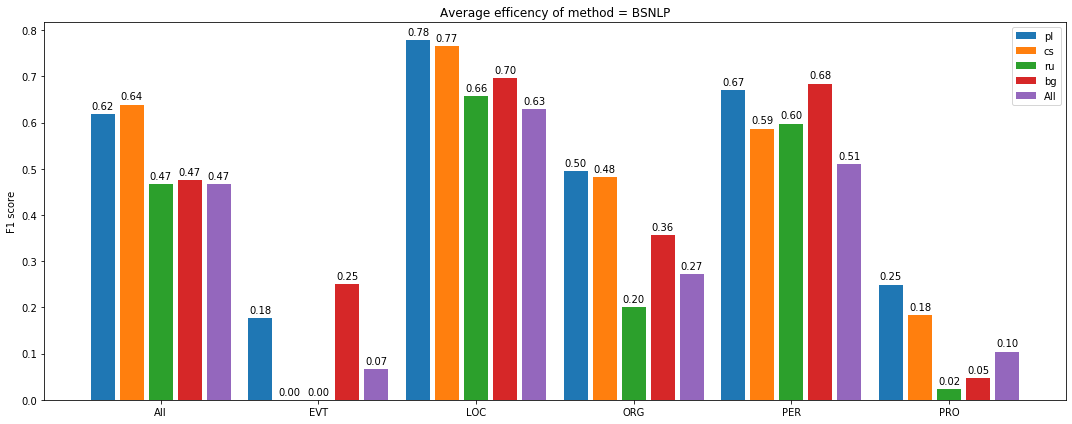

In [7]:
from visualize import visualize_all_categories, visualize_multiple_categories
visualize_multiple_categories(res2)

In [8]:
# from solvers import null_solver, prophecy, type0, wikidata, wikidata2, prych
# from solvers.fixers import simplefixer
# from solvers.wikidatan import identifier
# from metrics import mentions_catch, lea
# from collections import defaultdict
# from solvers.dummy.hardcoded_in_file import *
# from solvers.dummy.phrase_plugin import *
# from solvers.dummy.lemma_plugin import *
# from data_provider import *
# import visualize
# import fasttext_decorator
# from polyglot_decorator import *
# from solvers import null_solver
# import common
# fixer = simplefixer.SimpleFixer(gl_rep, 0.9,0.9, categories=["ORG", "EVT", "PER", "PRO", "LOC"], enrich=False)
# res = common.compare_methods(
#     T0 = {"ner": ner, "lemmatizer": lemma, "identifier": type0.identifier},
#     WH_FML = {"ner": ner, "lemmatizer": lemma, 
#               "identifier": identifier.Identifier(gl_rep), 
#                "crosslang_answer_fixer": simplefixer.MulitLangWrapper(fixer)
#               },
#     test_provider = test_provider,
#     metric_factory=lambda:lea.Lea(exact=True)
# )
# visualize.summarize_results(res[0], res[1:])

# Podsumowanie wyników metod

('pl', 'PER', 'NULL', 0.42386717384720396, 0.5365651389874052, 537, 0.3502930439164828, 554, 'Lea')
('pl', 'PER', 'H_RAW', 0.6640608417595056, 0.7028968877724341, 537, 0.6292915923015614, 554, 'Lea')


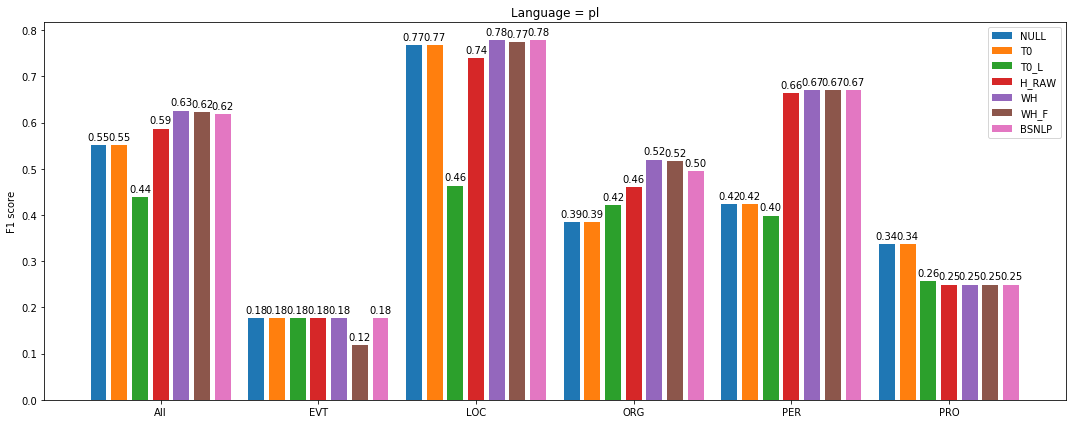

('cs', 'PER', 'NULL', 0.33654922932940046, 0.49944805593033237, 543, 0.2537776846945248, 589, 'Lea')
('cs', 'PER', 'H_RAW', 0.5627275470737699, 0.6931824991147871, 543, 0.47359780307942967, 589, 'Lea')


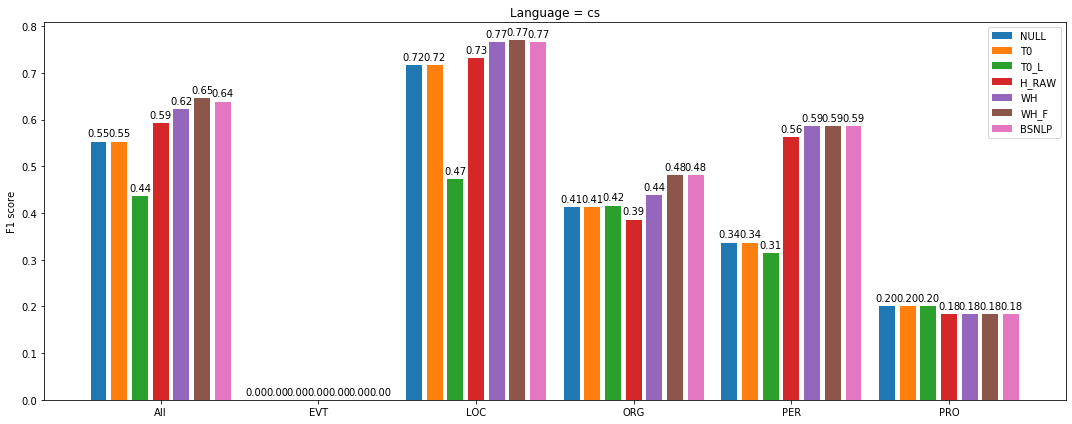

('ru', 'PER', 'NULL', 0.27231249720740625, 0.45222513089005234, 334, 0.19480967851344683, 382, 'Lea')
('ru', 'PER', 'H_RAW', 0.587923817003564, 0.66326736091134, 334, 0.5279514233767961, 382, 'Lea')


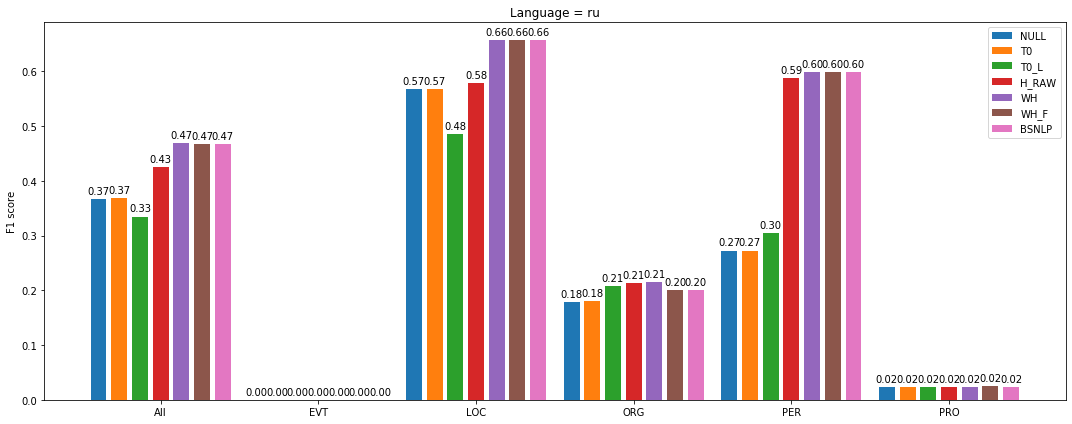

('bg', 'PER', 'NULL', 0.18433179723502302, 0.19047619047619047, 334, 0.17857142857142858, 336, 'Lea')
('bg', 'PER', 'H_RAW', 0.6668764756705007, 0.7242494824016563, 334, 0.6179261076099013, 336, 'Lea')


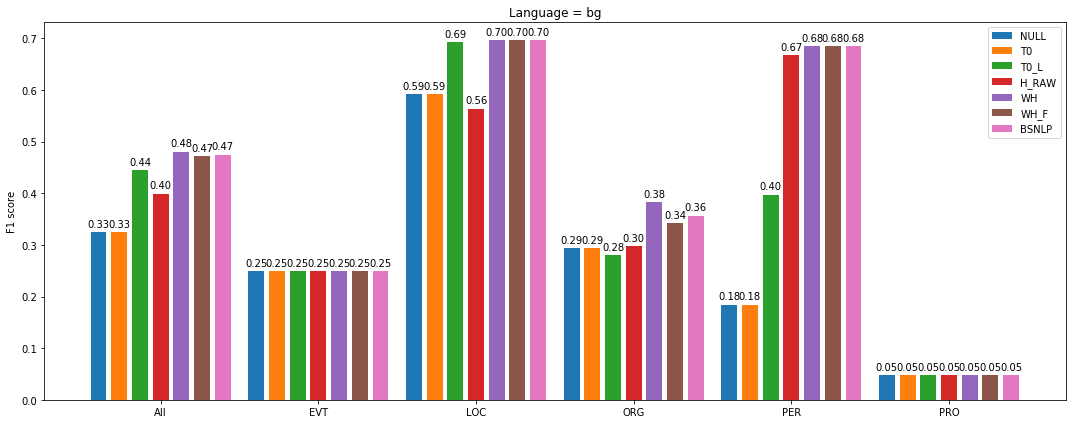

('All', 'PER', 'NULL', 0.25302522206350486, 0.4740606339746587, 1748, 0.1725650690907666, 1861, 'Lea')
('All', 'PER', 'H_RAW', 0.44557442209230746, 0.68027931597506, 1748, 0.331279009857494, 1861, 'Lea')


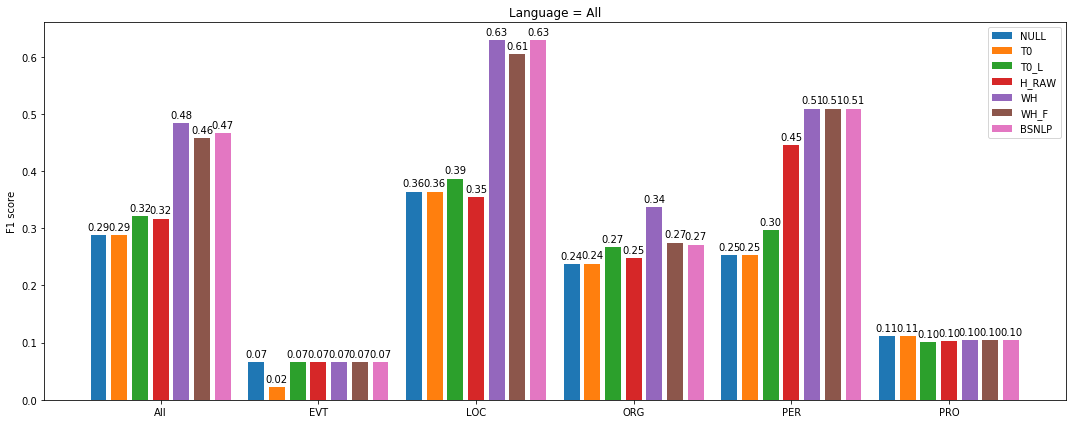

In [9]:
from visualize import visualize_compare_methods
# x = print(res + res2)
for sel_lang in ["pl", "cs", "ru", "bg", "All"]:
    x = [y for y in res if y[0] == sel_lang]
    x2 = [y for y in res2 if y[0] == sel_lang and y[2] != "T0"]
    print(x[0])
    print(x2[0])
    visualize_compare_methods(sel_lang, x+x2)

[('pl', 'All~WH', 'F1', 0.625700382680813, 0.6840405016526607, 3214, 0.5765296018815759, 3426, 'Lea'), ('pl', 'All~WH', 'PREC', 0.6840405016526607, 0.6840405016526607, 3214, 0.5765296018815759, 3426, 'Lea'), ('pl', 'All~WH', 'REC', 0.5765296018815759, 0.6840405016526607, 3214, 0.5765296018815759, 3426, 'Lea'), ('pl', 'All~WH_F', 'F1', 0.6230261530266427, 0.6546342122467702, 3214, 0.5943298042889587, 3426, 'Lea'), ('pl', 'All~WH_F', 'PREC', 0.6546342122467702, 0.6546342122467702, 3214, 0.5943298042889587, 3426, 'Lea')]


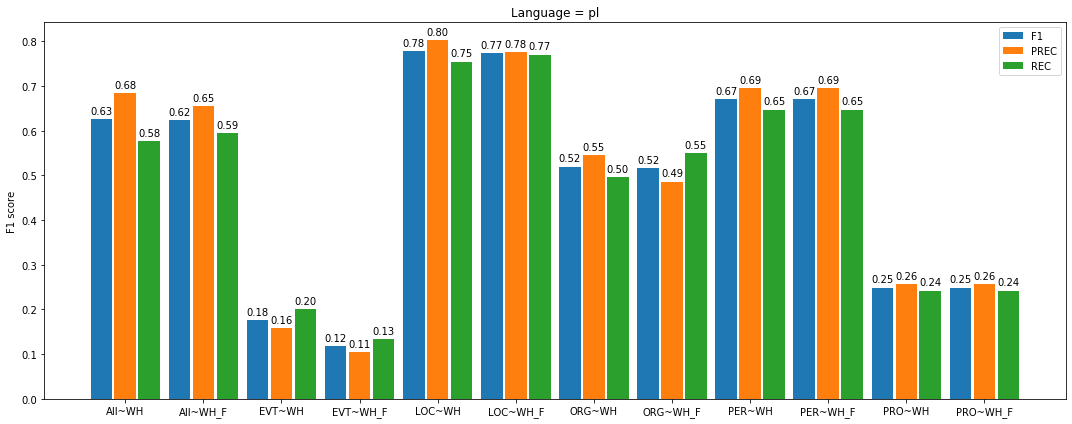

[('cs', 'All~WH', 'F1', 0.6229949990867576, 0.7082620740978607, 2913, 0.5560523273798378, 2976, 'Lea'), ('cs', 'All~WH', 'PREC', 0.7082620740978607, 0.7082620740978607, 2913, 0.5560523273798378, 2976, 'Lea'), ('cs', 'All~WH', 'REC', 0.5560523273798378, 0.7082620740978607, 2913, 0.5560523273798378, 2976, 'Lea'), ('cs', 'All~WH_F', 'F1', 0.6454470997684754, 0.7019358046863259, 2913, 0.5973731381583309, 2976, 'Lea'), ('cs', 'All~WH_F', 'PREC', 0.7019358046863259, 0.7019358046863259, 2913, 0.5973731381583309, 2976, 'Lea')]


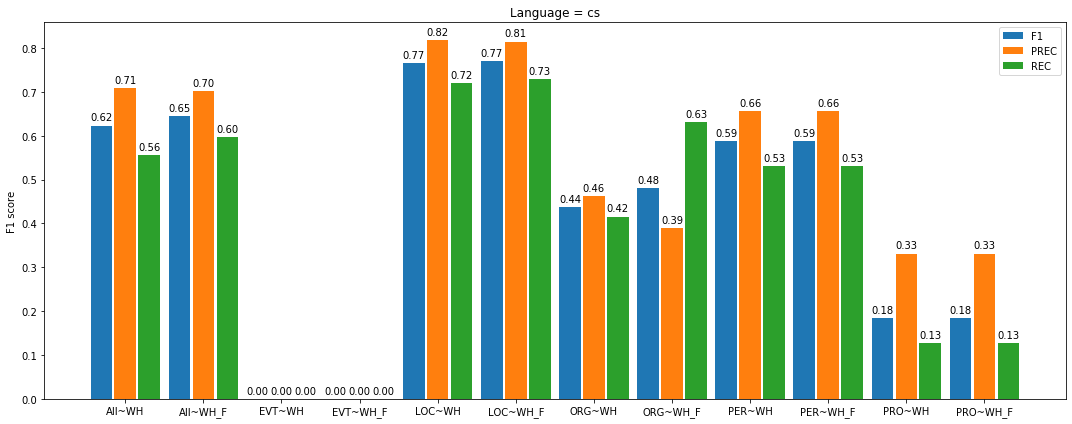

[('ru', 'All~WH', 'F1', 0.46823283076185696, 0.5579854493401336, 2563, 0.4033530209334044, 2179, 'Lea'), ('ru', 'All~WH', 'PREC', 0.5579854493401336, 0.5579854493401336, 2563, 0.4033530209334044, 2179, 'Lea'), ('ru', 'All~WH', 'REC', 0.4033530209334044, 0.5579854493401336, 2563, 0.4033530209334044, 2179, 'Lea'), ('ru', 'All~WH_F', 'F1', 0.4671327746814717, 0.5325614585024162, 2563, 0.4160217605462132, 2179, 'Lea'), ('ru', 'All~WH_F', 'PREC', 0.5325614585024162, 0.5325614585024162, 2563, 0.4160217605462132, 2179, 'Lea')]


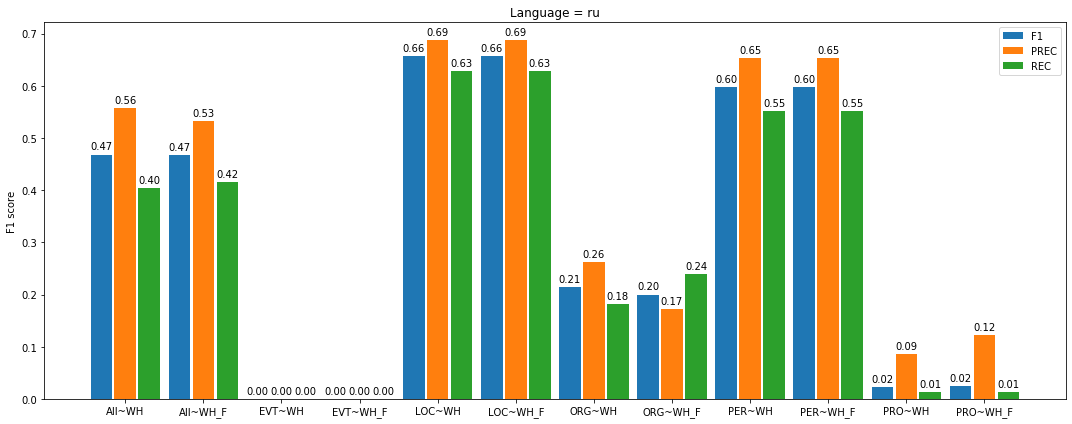

[('bg', 'All~WH', 'F1', 0.48083906183938696, 0.5141616679046519, 2100, 0.45157281365607227, 1830, 'Lea'), ('bg', 'All~WH', 'PREC', 0.5141616679046519, 0.5141616679046519, 2100, 0.45157281365607227, 1830, 'Lea'), ('bg', 'All~WH', 'REC', 0.45157281365607227, 0.5141616679046519, 2100, 0.45157281365607227, 1830, 'Lea'), ('bg', 'All~WH_F', 'F1', 0.47215042582894706, 0.4963885756208216, 2100, 0.4501691248566088, 1830, 'Lea'), ('bg', 'All~WH_F', 'PREC', 0.4963885756208216, 0.4963885756208216, 2100, 0.4501691248566088, 1830, 'Lea')]


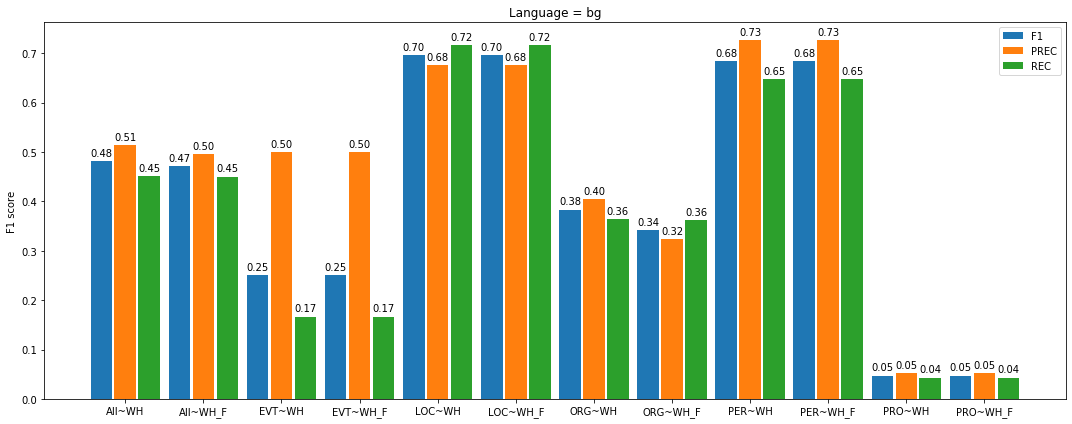

[('All', 'All~WH', 'F1', 0.48377008426479373, 0.6261229253445011, 10790, 0.3941562682756401, 10411, 'Lea'), ('All', 'All~WH', 'PREC', 0.6261229253445011, 0.6261229253445011, 10790, 0.3941562682756401, 10411, 'Lea'), ('All', 'All~WH', 'REC', 0.3941562682756401, 0.6261229253445011, 10790, 0.3941562682756401, 10411, 'Lea'), ('All', 'All~WH_F', 'F1', 0.45756570237780264, 0.6095478112319035, 10790, 0.3662471624853287, 10411, 'Lea'), ('All', 'All~WH_F', 'PREC', 0.6095478112319035, 0.6095478112319035, 10790, 0.3662471624853287, 10411, 'Lea')]


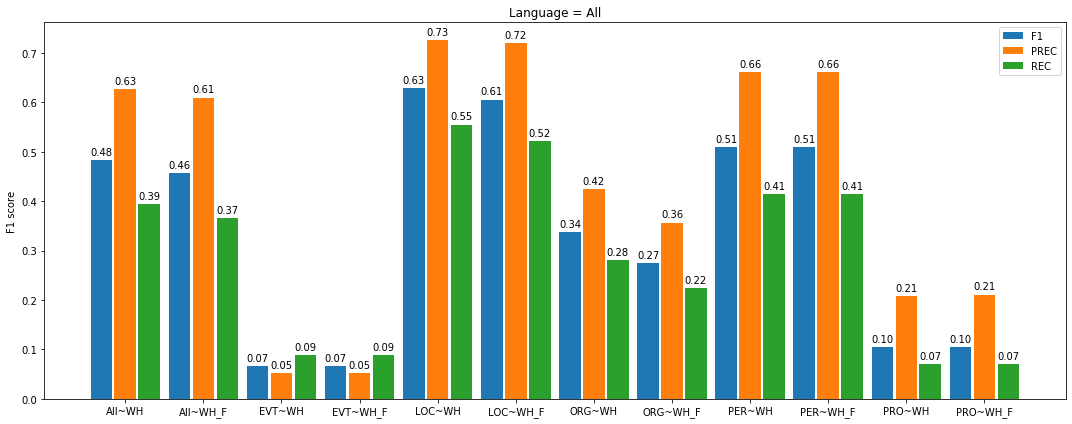

In [10]:
from visualize import visualize_compare_methods
import importlib
importlib.reload(visualize)
# x = print(res + res2)
for sel_lang in ["pl", "cs", "ru", "bg", "All"]:
    x = [y for y in res + res2 if y[0] == sel_lang and y[2] in ["WH", "WH_F"]]
    f1 = [(y[0], y[1]+"~"+y[2], "F1", y[3], y[4], y[5], y[6], y[7], y[8]) for y in x]
    prec = [(y[0], y[1]+"~"+y[2], "PREC", y[4], y[4], y[5], y[6], y[7], y[8]) for y in x]
    rec = [(y[0], y[1]+"~"+y[2], "REC", y[6], y[4], y[5], y[6], y[7], y[8]) for y in x]
    t = sorted(f1+prec+rec)
    print(t[0:5])
    visualize_compare_methods(sel_lang, t)

defaultdict(<function SeparateFixer.__init__.<locals>.<lambda> at 0x7f995f4cc6a8>, {'pl_EVT': defaultdict(<function SeparateFixer.__init__.<locals>.<lambda>.<locals>.<lambda> at 0x7f995f4cce18>, {'fasttext_hit': 40, 'fasttext_total_words': 104, 'total_mentions': 38, 'change_mentions': 20, 'sum_words': 104}), 'pl': defaultdict(<function SeparateFixer.__init__.<locals>.<lambda>.<locals>.<lambda> at 0x7f9af4202598>, {'total_keys': 756, 'sum_similarity': nan, 'num_similiarity': 3077700, 'total_merges': 82}), 'pl_LOC': defaultdict(<function SeparateFixer.__init__.<locals>.<lambda>.<locals>.<lambda> at 0x7f9af42026a8>, {'fasttext_hit': 1526, 'fasttext_total_words': 3666, 'total_mentions': 3114, 'change_mentions': 86, 'sum_words': 3666}), 'pl_ORG': defaultdict(<function SeparateFixer.__init__.<locals>.<lambda>.<locals>.<lambda> at 0x7f9af4202268>, {'fasttext_hit': 1294, 'fasttext_total_words': 3178, 'total_mentions': 1836, 'change_mentions': 512, 'sum_words': 3178}), 'cs_EVT': defaultdict(<fu

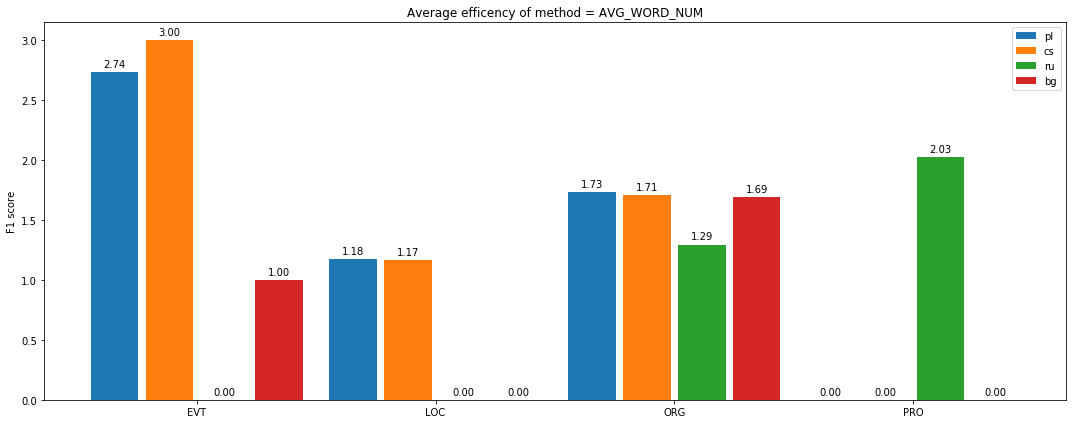

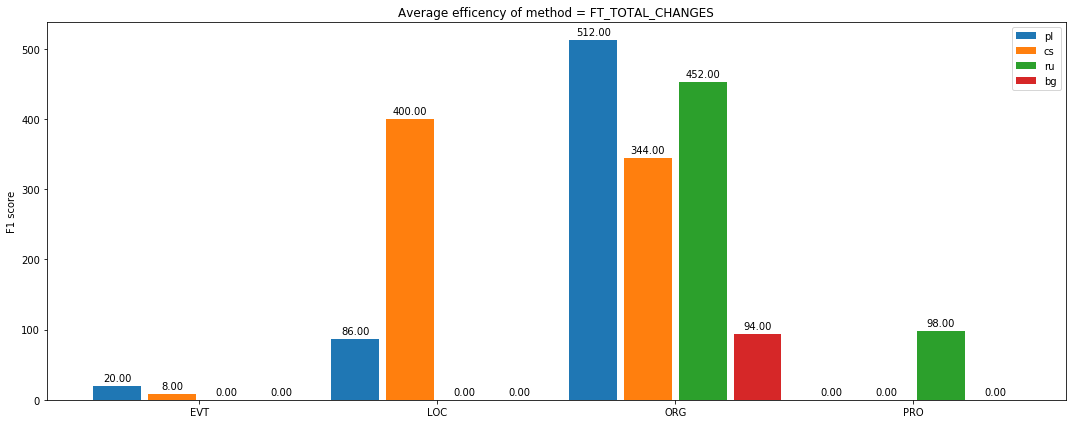

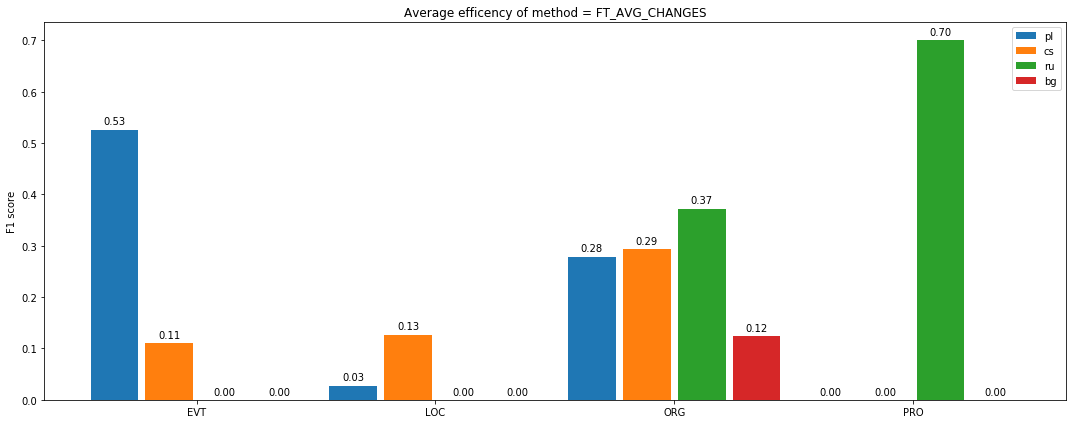

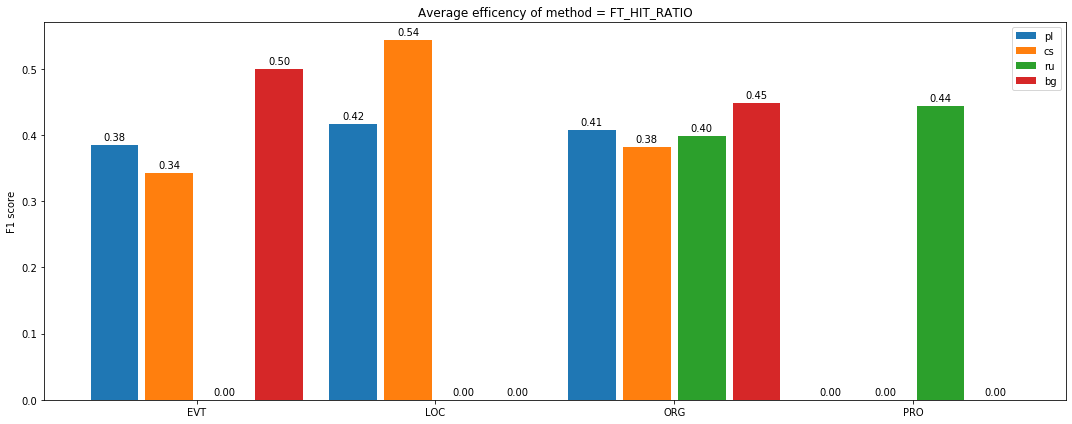

In [13]:
# FastTex Statistics
import importlib
importlib.reload(simplefixer)
importlib.reload(visualize)
def print_stats(statistics):
    print(statistics)
    m = [('Lang', 'Category', 'Method', 'F1', 'PRECIS', 'P[NUM]', 'RECALL', 'R[NUM]', 'metric')]
    for key, value in statistics.items():
        if key is not None and "_" in key:
            l, cat = key.split("_")
            m += [(l, cat, "FT_HIT_RATIO", value["fasttext_hit"]/value["fasttext_total_words"], 1.0,1,1.0,1, "X")]
            m += [(l, cat, "AVG_WORD_NUM", value["sum_words"] / value["total_mentions"], 1.0,1,1.0,1, "X")]
            m += [(l, cat, "FT_AVG_CHANGES", value["change_mentions"]/value["total_mentions"], 1.0,1,1.0,1, "X")]
            m += [(l, cat, "FT_TOTAL_CHANGES", value["change_mentions"], 1.0,1,1.0,1, "X")]
    return m

x = print_stats(fixer.statistics)
visualize_multiple_categories(x)

# from collections import defaultdict
# print(fixer.statistics)
# d = defaultdict(lambda:defaultdict(lambda:0))
# for _, f2 in fixer.fixers.items():
#     for _, f in f2.items():
#         for l_cat, stat_dict in f.statistics.items():
#             if l_cat != None:
#                 for k, v in stat_dict.items():
#                     d[l_cat][k] += v if k != None else 0
# x = print_stats(d)
# visualize_multiple_categories(x)
# print_stats(fixer2.statistics)

# Method comparision 

In [12]:
from visualize import visualize_compare_methods
import importlib
importlib.reload(visualize)
def compare_methods(r, langs = ["pl", "cs", "ru", "bg", "All"], methods = ["WH", "WH_F"]):
# x = print(res + res2)
    for sel_lang in langs:
        x = [y for y in r if y[0] == sel_lang and y[2] in methods]
        f1 = [(y[0], y[1]+"~"+y[2], "F1", y[3], y[4], y[5], y[6], y[7], y[8]) for y in x]
        prec = [(y[0], y[1]+"~"+y[2], "PREC", y[4], y[4], y[5], y[6], y[7], y[8]) for y in x]
        rec = [(y[0], y[1]+"~"+y[2], "REC", y[6], y[4], y[5], y[6], y[7], y[8]) for y in x]
        t = sorted(f1+prec+rec)
        visualize_compare_methods(sel_lang, t, title="Nordstream, Language = ")
        t2 = sorted([(y[0], y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8]) for y in x])
        visualize_compare_methods(sel_lang, t2, title="Nordstream, Language = ")

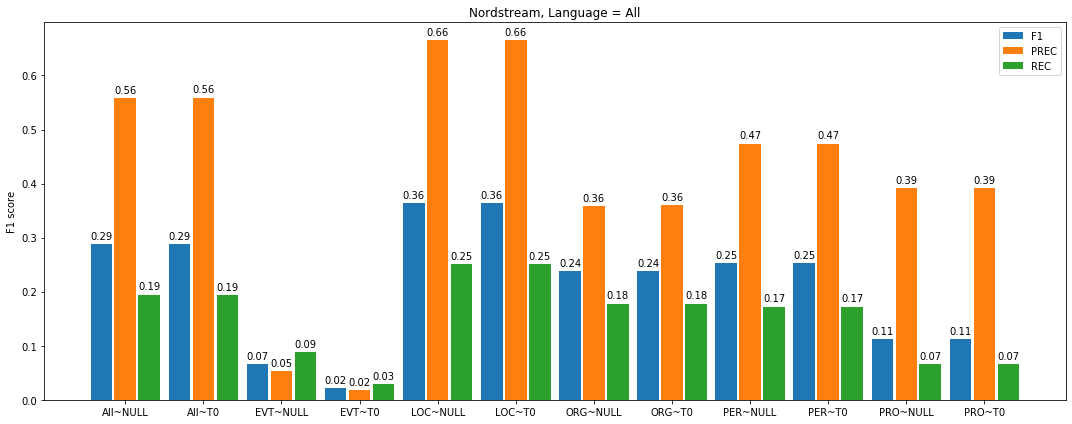

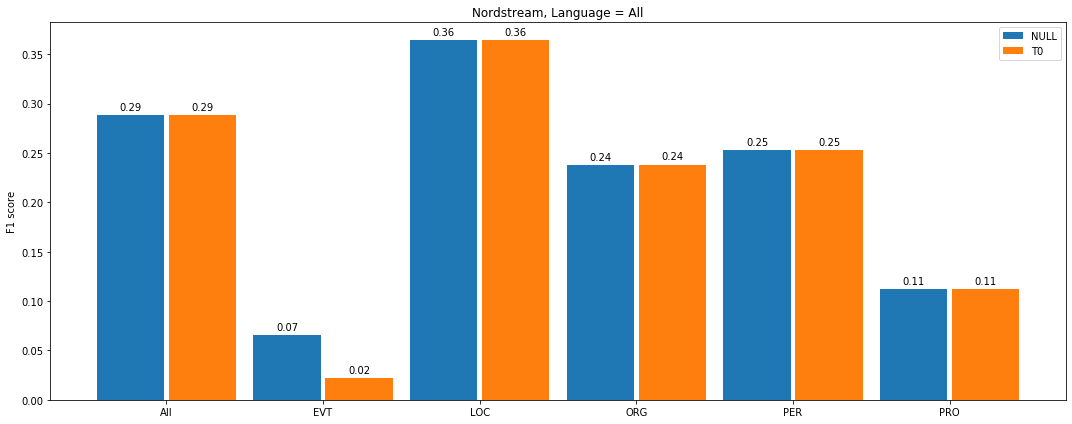

In [13]:
#Rozdział 4.3.2
compare_methods(res+res2, langs=["All"], methods=["NULL", "T0"])

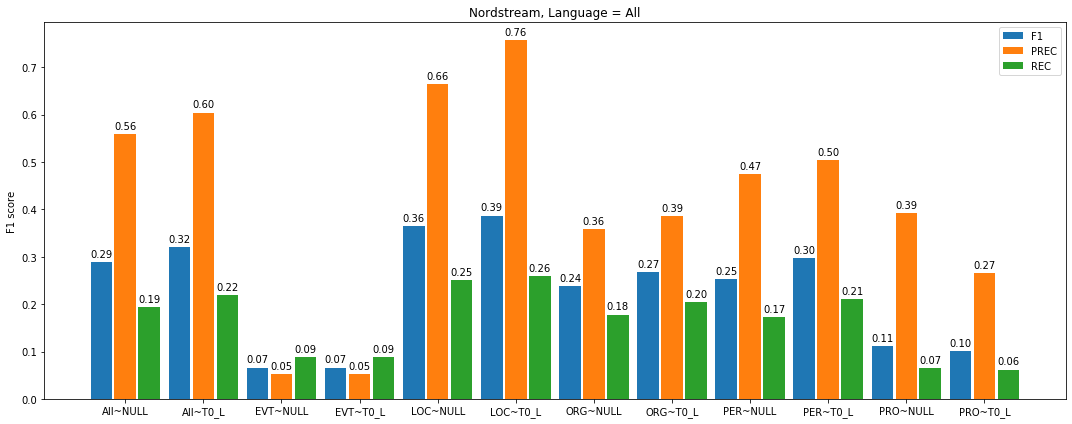

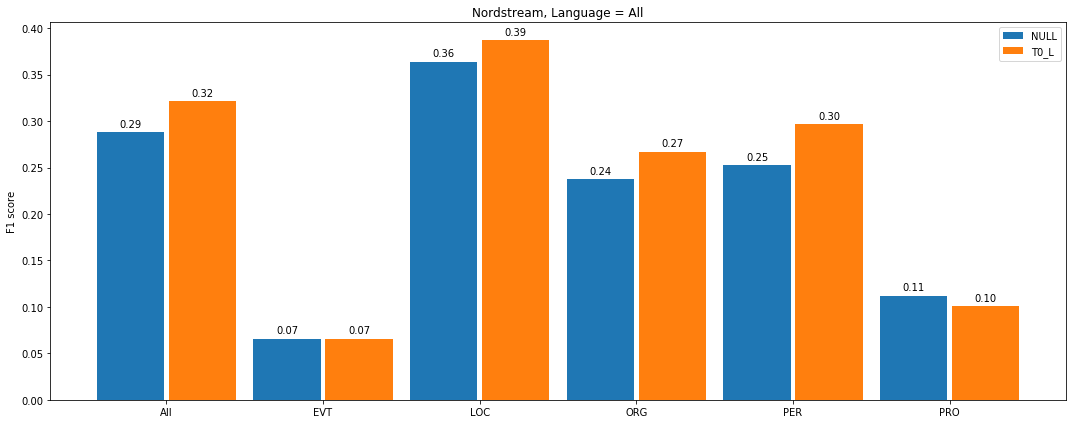

In [14]:
#Rozdział 4.3.3
compare_methods(res+res2, langs=["All"], methods=["T0_L", "NULL"])

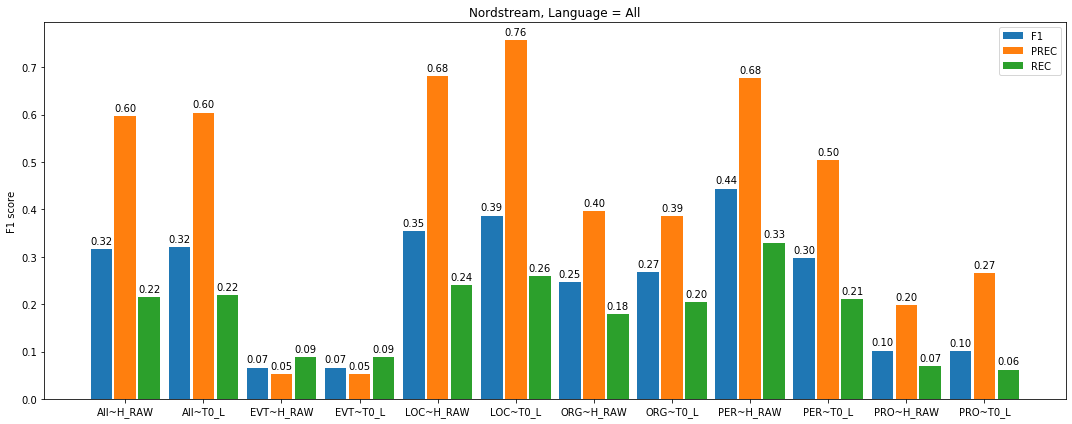

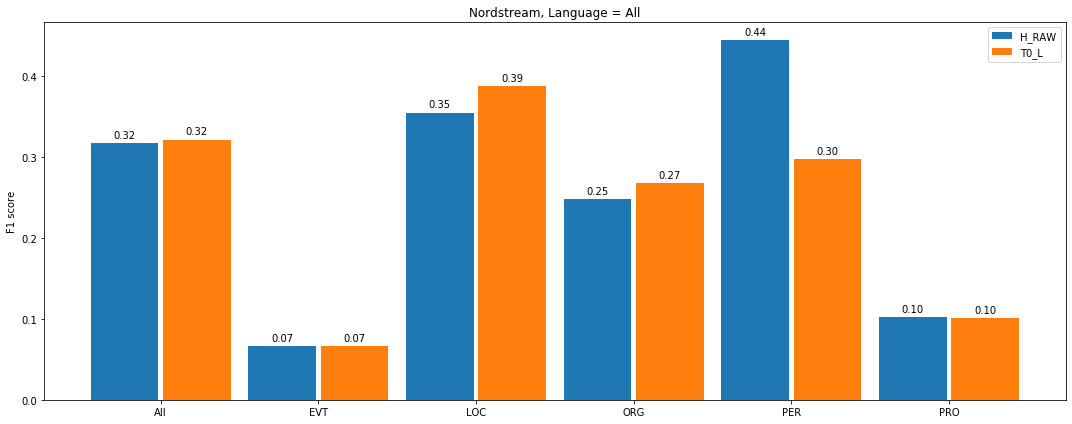

In [15]:
#Rozdział 4.3.7
compare_methods(res+res2, langs=["All"], methods=["H_RAW", "T0_L"])

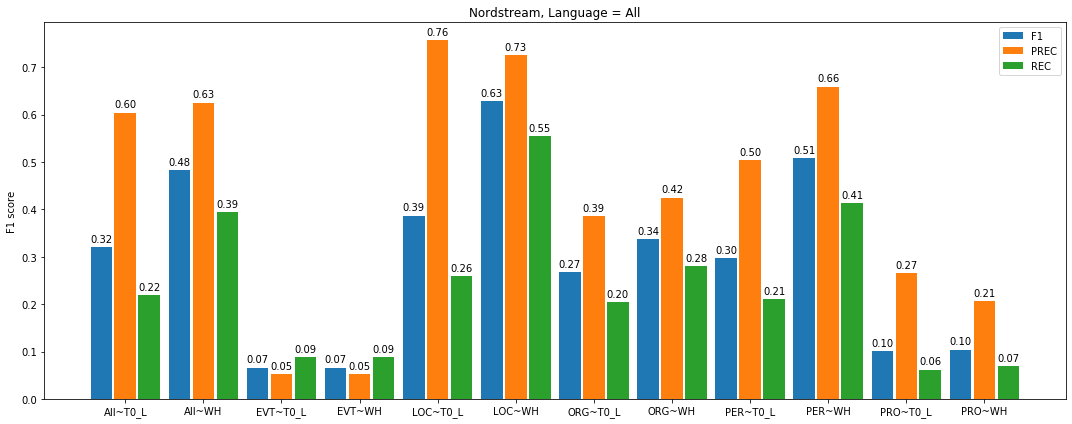

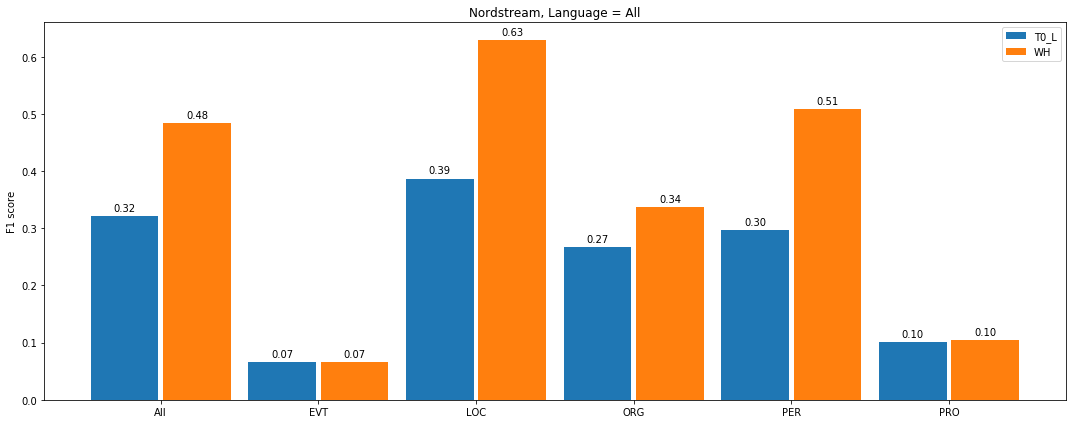

In [16]:
#Rozdział 4.3.7
compare_methods(res+res2, langs=["All"], methods=["WH", "T0_L"])

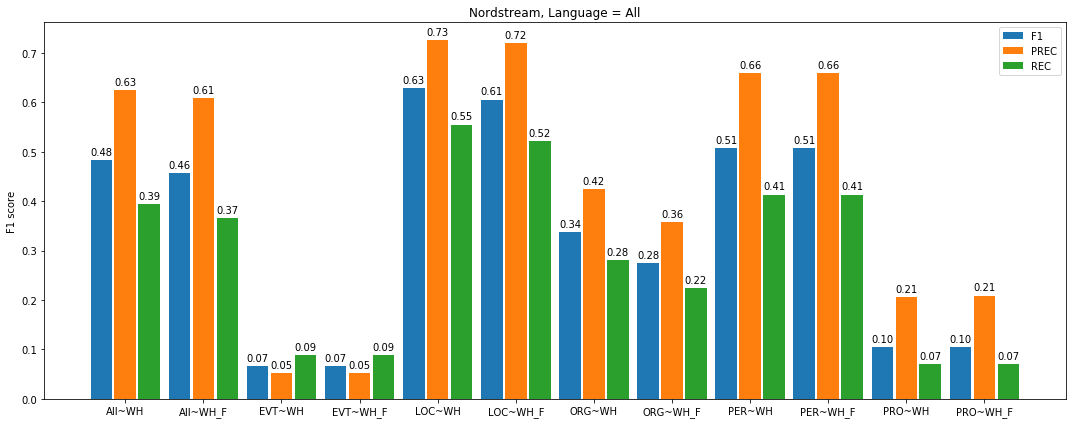

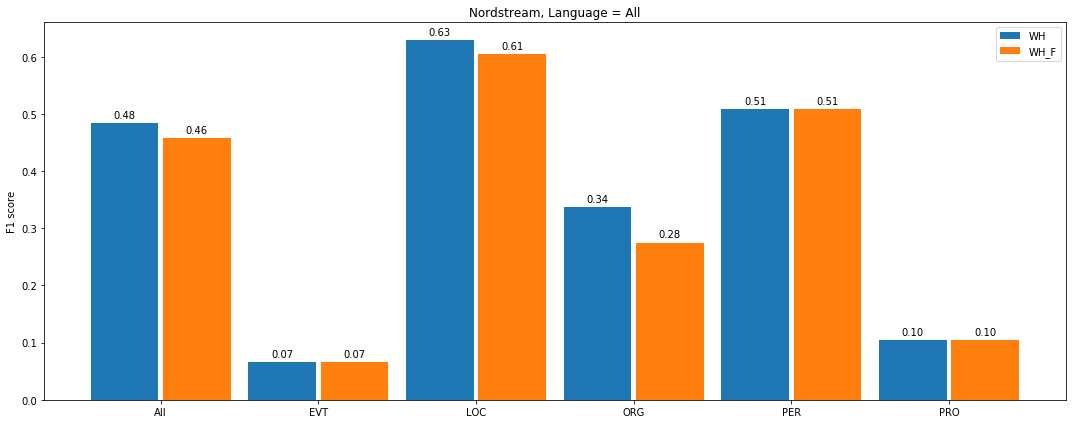

In [17]:
#Rozdział 4.3.8
compare_methods(res+res2, langs=["All"], methods=["WH_F", "WH"])

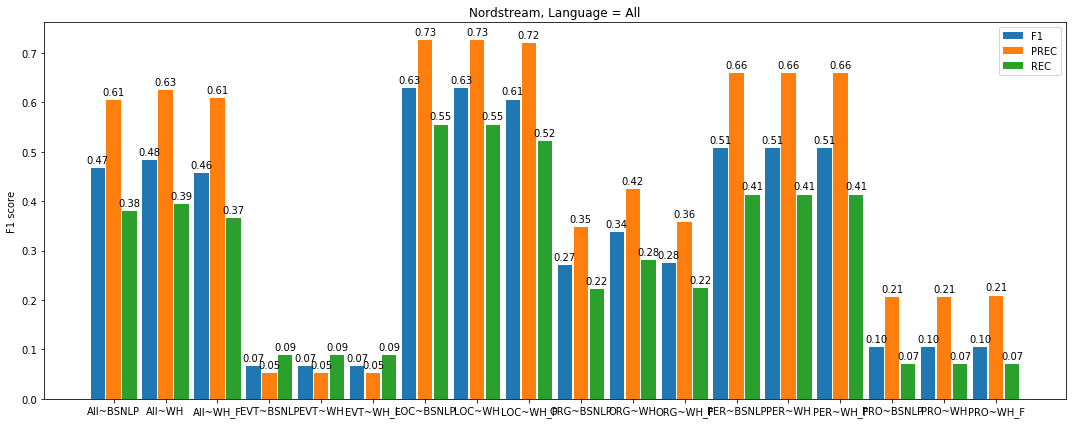

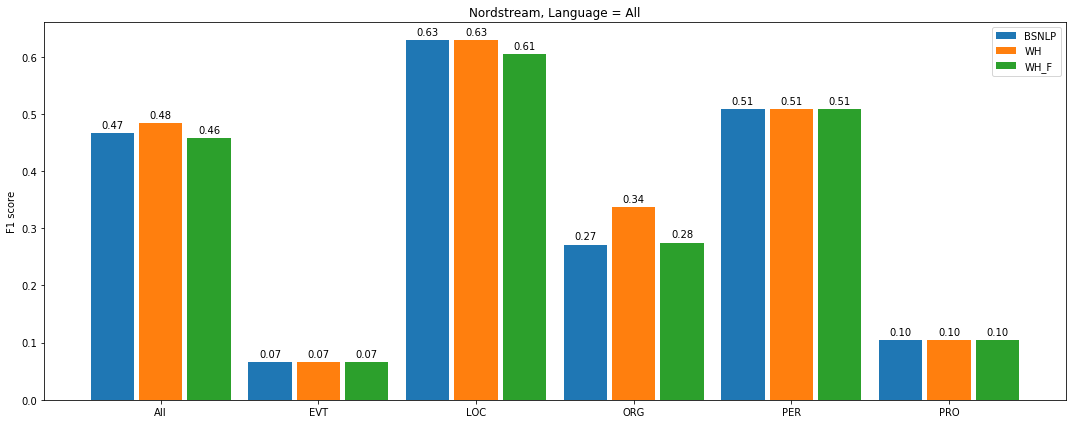

In [19]:
compare_methods(res+res2, langs=["All"], methods=["WH", "WH_F", "BSNLP"])

# Pokrycie fraz ze zbioru FastText'em


simple fixer: 100%|██████████| 687/687 [03:53<00:00,  2.95it/s] 


removing element from fasttext cache



simple fixer:   0%|          | 0/619 [00:00<?, ?it/s]

Using stripped file



simple fixer: 100%|██████████| 619/619 [02:57<00:00,  3.49it/s] 


removing element from fasttext cache



simple fixer:   0%|          | 0/453 [00:00<?, ?it/s]

Using stripped file



simple fixer: 100%|██████████| 453/453 [01:29<00:00,  5.05it/s] 


removing element from fasttext cache



simple fixer:   0%|          | 0/403 [00:00<?, ?it/s]

Using stripped file



simple fixer: 100%|██████████| 403/403 [01:08<00:00,  5.89it/s] 

simple fixer:   0%|          | 0/687 [00:00<?, ?it/s]

removing element from fasttext cache
Using stripped file



simple fixer: 100%|██████████| 687/687 [03:55<00:00,  2.92it/s] 

simple fixer:   0%|          | 0/619 [00:00<?, ?it/s]

removing element from fasttext cache
Using stripped file



simple fixer: 100%|██████████| 619/619 [02:59<00:00,  3.44it/s] 


removing element from fasttext cache



simple fixer:   0%|          | 0/403 [00:00<?, ?it/s]

Using stripped file



simple fixer: 100%|██████████| 403/403 [01:06<00:00,  6.09it/s] 

simple fixer:   0%|          | 0/453 [00:00<?, ?it/s]

removing element from fasttext cache
Using stripped file



simple fixer: 100%|██████████| 453/453 [01:31<00:00,  4.96it/s] 


Flush on  ner <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  lemmatizer <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  identifier <class 'solvers.wikidatan.identifier.Identifier'>
Identifier is Flushing
Flush on  answer_fixer <class 'solvers.fixers.simplefixer.SimpleFixer'>
Got exception 
NER cached:  571/1142
Lemma cached:  571/1142
function [compare_identifier_methods] finished in 23 min 36 s 692 ms


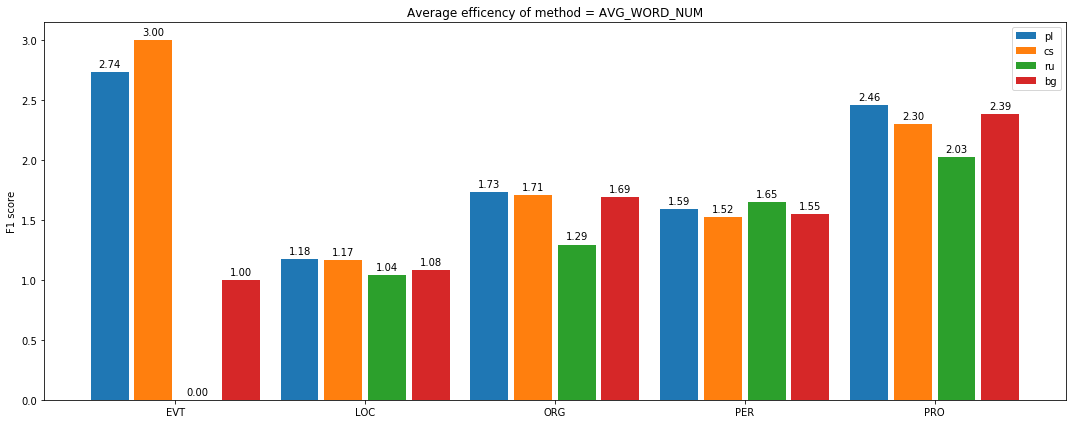

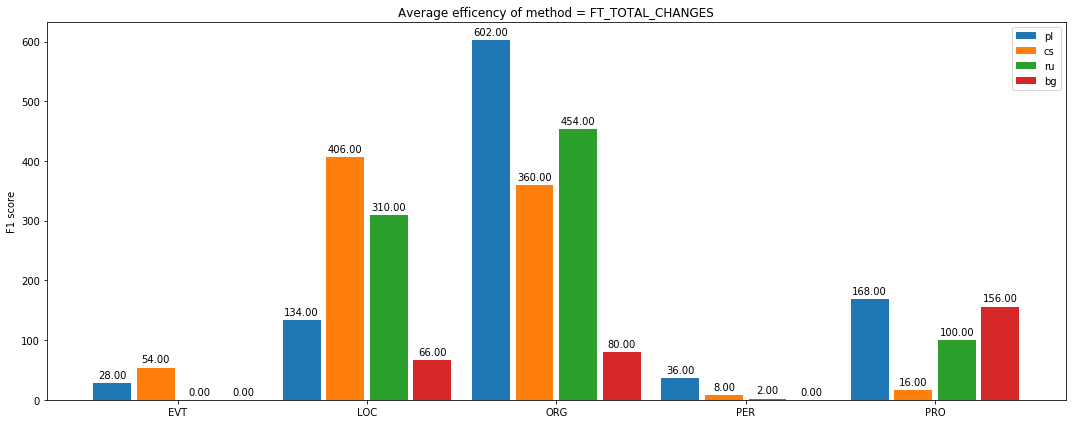

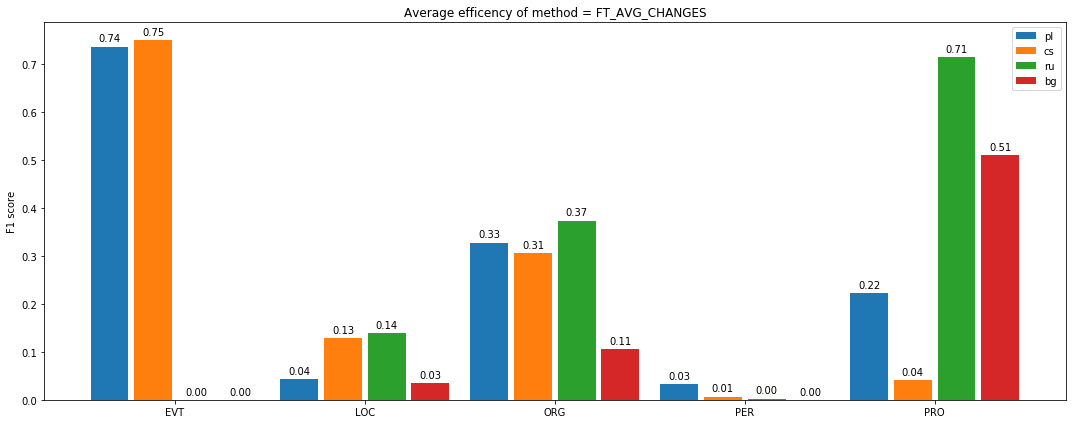

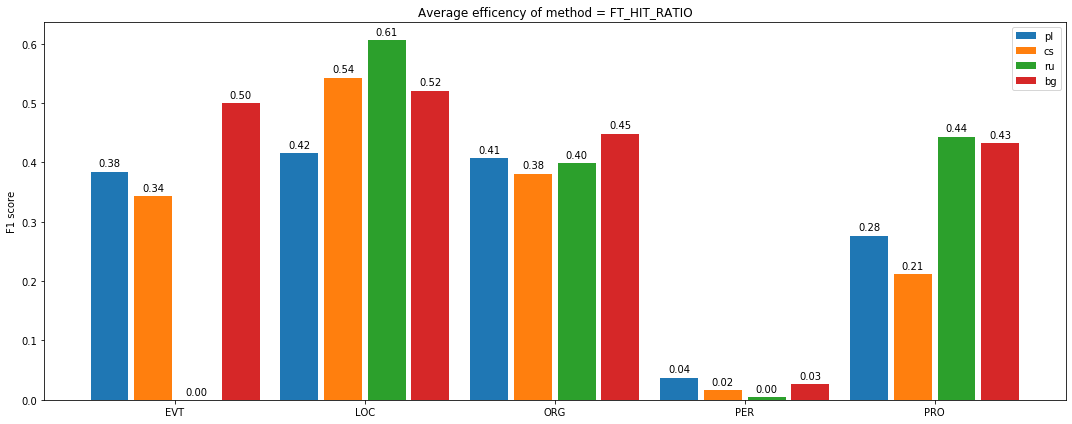

In [68]:

fixer3 = simplefixer.SimpleFixer(gl_rep, 0.9,0.9, categories=["ORG", "EVT", "PER", "PRO", "LOC"], enrich=False)
common.compare_identifier_methods(
    ner = ner,
    lemma = lemma,
    BSNLP = {"identifier": identifier.Identifier(gl_rep), 
             "answer_fixer": fixer3},
    test_provider = test_provider,
    metric_factory=lambda:lea.Lea(exact=True)
)
x = print_stats(fixer3.statistics)
visualize_multiple_categories(x)